In [1]:
from datgan import DATGAN
import datgan

import numpy as np
import pandas as pd
import networkx as nx

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import tensorflow as tf

#tf.config.run_functions_eagerly(True)

In [4]:
df = pd.read_csv('../../data/LTDS/cleaned_bias.csv')

In [5]:
df.head()

,gender,age,ethnicity,hh_borough,hh_people,hh_income,hh_carvan,hh_comp
0,male,20,White,Barnet,5,75-100k,4,Couple family
1,male,14,White,Barnet,5,75-100k,4,Couple family
2,male,59,White,Barnet,3,10-15k,3,Couple family
3,female,56,White,Barnet,3,10-15k,3,Couple family
4,female,53,White,Barnet,5,50-75k,1,Couple family


In [6]:
data_info = {
    'age': {
        'type': 'continuous',
        'bounds': [0, 100],
        'discrete': True
    }
}

# Add the other variables as categorical
for c in df.columns:
    if c not in data_info.keys():
        data_info[c] = {'type': 'categorical'}

In [11]:
graph = nx.DiGraph()

graph.add_edges_from([
    ('age', 'hh_comp'),
    ('gender', 'hh_comp'),
    ('ethnicity', 'hh_people'),
    ('hh_borough', 'hh_comp'),
    ('hh_borough', 'hh_carvan'),
    ('hh_borough', 'hh_income'),
    ('hh_comp', 'hh_income'),
    ('hh_comp', 'hh_people'),
    ('hh_income', 'hh_carvan'),
    ('hh_people', 'hh_carvan')
])

Preparing advice...
You might want to add the following edges in your DAG (direction not given here):
  - age <-> hh_people
  - hh_carvan <-> hh_comp


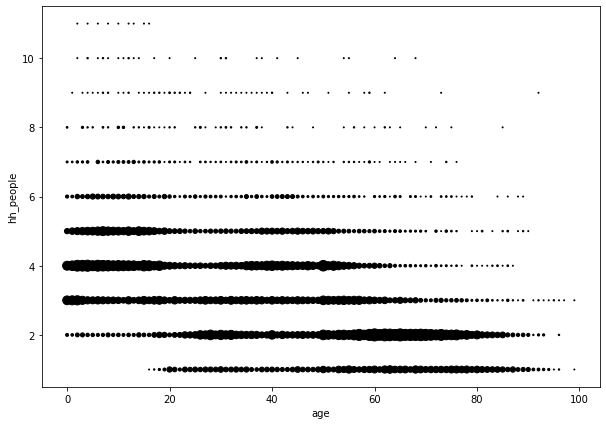

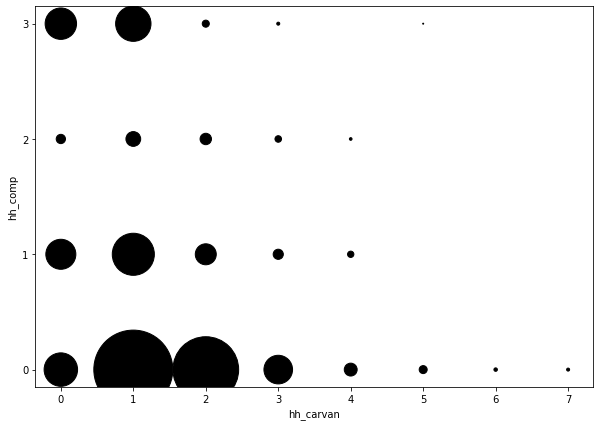

In [12]:
datgan.advise(df, graph, plot_graphs=True)

In [13]:
name = 'ciDATGAN_bias'

In [14]:
output_folder = './output/{}/'.format(name)

In [15]:
datgan = DATGAN(output=output_folder,
                loss_function='WGAN',
                conditional_inputs=['age', 'gender', 'hh_borough'],
                batch_size=1878,
                num_epochs=1000)

In [16]:
datgan.fit(df, data_info, graph, preprocessed_data_path='./output/encoded_bias')

Preprocessed data have been loaded!
Start training DATGAN with the WGAN loss (28/06/2022 15:35:19).


Training DATGAN: 100%|█████████████████████████████████████████████████████████████| 1000/1000 [15:46<00:00,  1.06it/s]

DATGAN has finished training (28/06/2022 15:51:05) - Training time: 15 minutes and 46 seconds


# Sampling

In [17]:
samp = datgan.sample(len(df), inputs=df[datgan.conditional_inputs], randomize=False)
samp.to_csv('../../data/synthetic/ciDATGAN_bias.csv', index=False)

Sampling from DATGAN: 100%|███████████████████████████████████████████████████| 18783/18783 [00:00<00:00, 44196.29it/s]


In [18]:
boroughs = ['City of London', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']

In [19]:
count = 1
for b in boroughs:

    tmp = pd.read_csv('../../data/nomis/{}.csv'.format(b))

    print('Sampling for {} ({}/{})'.format(b, count, len(boroughs)))

    samp = datgan.sample(len(tmp), inputs=tmp, randomize=False)

    samp.to_csv('../../data/ciDATGAN_bias/{}.csv'.format(b), index=False)

    count += 1

Sampling for City of London (1/10)


Sampling from DATGAN: 100%|█████████████████████████████████████████████████████| 7375/7375 [00:00<00:00, 49337.04it/s]


Sampling for Westminster (2/10)


Sampling from DATGAN: 100%|█████████████████████████████████████████████████| 219396/219396 [00:05<00:00, 36875.50it/s]


Sampling for Kingston upon Thames (3/10)


Sampling from DATGAN: 100%|█████████████████████████████████████████████████| 160060/160060 [00:04<00:00, 38245.24it/s]


Sampling for Bromley (4/10)


Sampling from DATGAN: 100%|█████████████████████████████████████████████████| 309392/309392 [00:09<00:00, 32670.92it/s]


Sampling for Greenwich (5/10)


Sampling from DATGAN: 100%|█████████████████████████████████████████████████| 254557/254557 [00:07<00:00, 33696.51it/s]


Sampling for Havering (6/10)


Sampling from DATGAN: 100%|█████████████████████████████████████████████████| 237232/237232 [00:06<00:00, 34416.32it/s]


Sampling for Barnet (7/10)


Sampling from DATGAN: 100%|█████████████████████████████████████████████████| 356386/356386 [00:11<00:00, 29854.88it/s]


Sampling for Enfield (8/10)


Sampling from DATGAN: 100%|█████████████████████████████████████████████████| 312466/312466 [00:10<00:00, 30777.34it/s]


Sampling for Hillingdon (9/10)


Sampling from DATGAN: 100%|█████████████████████████████████████████████████| 273936/273936 [00:08<00:00, 32915.31it/s]


Sampling for Brent (10/10)


Sampling from DATGAN: 100%|█████████████████████████████████████████████████| 311215/311215 [00:09<00:00, 31240.41it/s]


In [20]:
len(df)

18783